# Выбор локации для скважины

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None);  # Display all dataframe columns

In [2]:
df_0 = pd.read_csv('geo_data_0.csv')  #чтение файла `geo_data_0.csv` и сохранение в переменной `df0`
df_1 = pd.read_csv('geo_data_1.csv')  #чтение файла `geo_data_1.csv` и сохранение в переменной `df1`
df_2 = pd.read_csv('geo_data_2.csv')  #чтение файла `geo_data_2.csv` и сохранение в переменной `df2`

In [3]:
display(df_0.sample(5)) # просмотр 5 строк таблицы `df0`
display(df_1.sample(5)) # просмотр 5 строк таблицы `df1`
display(df_2.sample(5)) # просмотр 5 строк таблицы `df2`

,id,f0,f1,f2,product
66928,vDa1U,1.767013,-0.378328,4.427450,140.601224
31816,zDcrv,-0.677174,0.580010,3.560963,60.018827
13999,lJd0d,0.421885,0.918719,4.056965,146.900678
42705,kzj0J,1.139184,0.414792,4.076181,76.216981
71546,9WYas,1.124779,-0.411301,0.102430,105.639998


,id,f0,f1,f2,product
74991,fgoNG,5.530270,-1.283836,3.004520,80.859783
78474,eFFFD,12.922077,0.126694,0.999873,26.953261
28627,5AbTo,12.857763,-1.713534,-0.006662,0.000000
69322,SjV5r,-8.993127,-1.448482,-0.005114,3.179103
49964,7546e,0.100432,-3.843554,2.992677,80.859783


,id,f0,f1,f2,product
93128,HwBp1,4.720061,-3.841843,4.612302,77.240431
95946,k0boE,1.737985,0.033010,2.551570,74.584153
68255,iYJh3,2.551501,-0.521780,-1.140032,29.725987
48601,ScLYp,1.325139,0.294231,1.887168,126.716454
54099,kZZcS,-0.928131,1.745928,1.852076,76.577655


In [4]:
df_0.info() #получение общей информации о таблице `df0`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_1.info() #получение общей информации о таблице `df1`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df_2.info() #получение общей информации о таблице `df2`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


В таблицах по 5 столбцов. Типы данных в столбцах: object и float64.

Согласно документации к данным:
* `id` — уникальный идентификатор скважины;
* `f0, f1, f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
* `product` — объём запасов в скважине (тыс. баррелей).

Целевой признак для модели - `product`.

Названия столбцов корректные в соответствие с хорошим стилем, исправление названий не требуется.

Количество значений в столбцах одинаковое, значит, пропущенных значений нет.

### Выводы

В каждой строке таблиц `df0`, `df1` и `df2` данные о скважинах трёх регионов: идентификатор скважины, признаки точек и объём запасов сырья. 

Предварительно можно утверждать, что, данных достаточно для прогнозирования и расчёта прибыли и рисков. Пропущенных значений в данных нет, заголовки столбцов корректные в соответствие с хорошим стилем.

Чтобы двигаться дальше, необходимо проверить данные на наличие выбросов и дубликатов.

## Предобработка данных

### Проверка на  дубликаты

Проверим таблицу на наличие явных дубликатов.

In [7]:
print ('Дубликатов в таблице df_0:', df_0.duplicated().sum())
print ('Дубликатов в таблице df_1:', df_1.duplicated().sum())
print ('Дубликатов в таблице df_2:', df_2.duplicated().sum())

Дубликатов в таблице df_0: 0
Дубликатов в таблице df_1: 0
Дубликатов в таблице df_2: 0


**Выводы**

Явные дубликаты не обнаружены.

### Проверка данных на аномалии

In [8]:
# посмотрим общую информацию о данных в таблицах `df0`, `df1`, `df2`
display(df_0.describe())
display(df_1.describe())
display(df_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


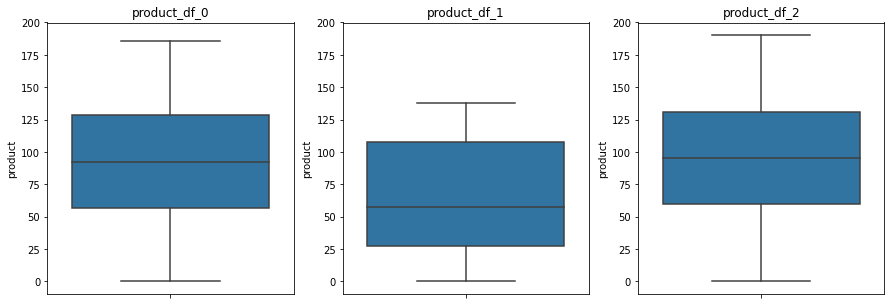

In [9]:
# проверим на выбросы значения в столбце `product`, построим boxplot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax = axs[0]
sns.boxplot(data=df_0,y='product',ax=ax)
ax.set_ylim([-10,200]);
ax.set_title('product_df_0');

ax = axs[1]
sns.boxplot(data=df_1,y='product',ax=ax)
ax.set_ylim([-10,200]);
ax.set_title('product_df_1');

ax = axs[2]
sns.boxplot(data=df_2,y='product',ax=ax)
ax.set_ylim([-10,200]);
ax.set_title('product_df_2');

Аномальных значений не обнаружено.

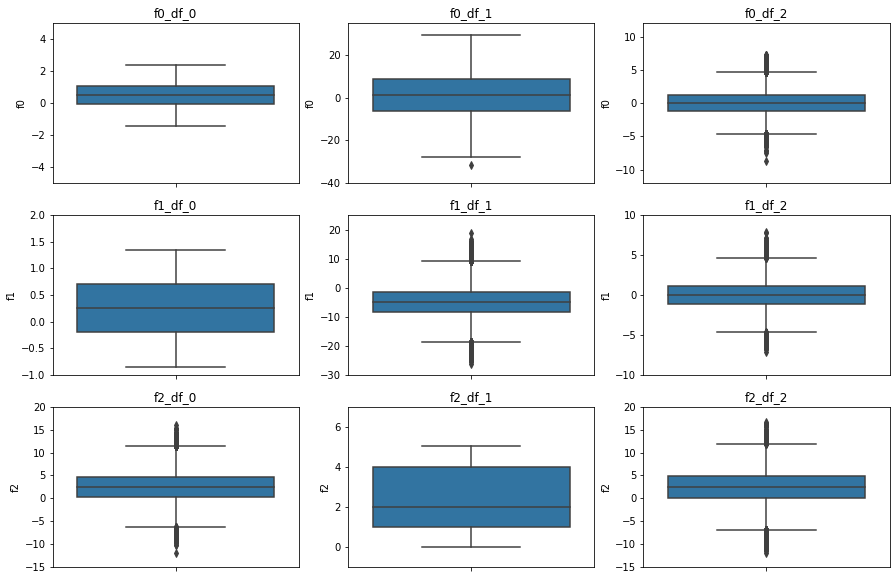

In [10]:
# проверим на выбросы значения в столбцах `f0`, `f1`, `f2`, построим boxplot
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

ax = axs[0,0]
sns.boxplot(data=df_0,y='f0',ax=ax)
ax.set_ylim([-5,5]);
ax.set_title('f0_df_0');

ax = axs[0,1]
sns.boxplot(data=df_1,y='f0',ax=ax)
ax.set_ylim([-40,35]);
ax.set_title('f0_df_1');

ax = axs[0,2]
sns.boxplot(data=df_2,y='f0',ax=ax)
ax.set_ylim([-12,12]);
ax.set_title('f0_df_2');

ax = axs[1,0]
sns.boxplot(data=df_0,y='f1',ax=ax)
ax.set_ylim([-1,2]);
ax.set_title('f1_df_0');

ax = axs[1,1]
sns.boxplot(data=df_1,y='f1',ax=ax)
ax.set_ylim([-30,25]);
ax.set_title('f1_df_1');

ax = axs[1,2]
sns.boxplot(data=df_2,y='f1',ax=ax)
ax.set_ylim([-10,10]);
ax.set_title('f1_df_2');

ax = axs[2,0]
sns.boxplot(data=df_0,y='f2',ax=ax)
ax.set_ylim([-15,20]);
ax.set_title('f2_df_0');

ax = axs[2,1]
sns.boxplot(data=df_1,y='f2',ax=ax)
ax.set_ylim([-1,7]);
ax.set_title('f2_df_1');

ax = axs[2,2]
sns.boxplot(data=df_2,y='f2',ax=ax)
ax.set_ylim([-15,20]);
ax.set_title('f2_df_2');

Аномальные значения присутствуют для признаков `f0` и `f1` в таблицах `df_1` и `df_2`, для признака `f2` - в `df_0` и `df_2`. На данном этапе предлагается их оставить, но возможно придётся удалить из обучающей выборки, в случае если не получится достигнуть необходимых значений метрик.

**Выводы**

На данном этапе мы проверили значения в столбце `product` и столбцах с признаками в таблицах на аномалии - аномальных значений в столбце `product` не выявлено, в столбцах с признакми присутствуют аномальные значения, но на данном этапе принято решение не удалять их.

### Выводы

На этапе предобработки данных мы проверили данные на дубликаты и выбросы: дубликатов не обнаружено, аномальных значений не выявлено.

## Обучение и проверка модели

Наш целевой признак `product` (объём запасов в скважине) является количественным, поэтому мы будем подбирать модель для решения задачи регрессии. По условиям задачи для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

Напишем функцию для обучения и проверки модели.

In [11]:
def model(df, reg):
    # подготовим отдельные таблицы с признаками, определяющими целевой признак, и целевым признаком
    # удалим также столбец `id`, так как он не являтся признаком, учавствующим в предсказании
    features = df.drop(['id', 'product'], axis=1)
    target = df['product']
    
    # разделим таблицы на обучающую выборку и валидационною в соотношении 75:25
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    model = LinearRegression() # инициализируем модель LinearRegression
    model.fit(features_train, target_train) # обучим модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # получим предсказания модели на валидационной выборке

    # посчитаем средний запас предсказанного сырья
    predict_prod_mean = predictions_valid.mean()

    # посчитаем значение метрики RMSE на валидационной выборке
    rmse = mean_squared_error(target_valid, predictions_valid)**0.5
    
    return (
        f'Средний запас предсказанного сырья Региона {reg}: {predict_prod_mean}\n'
        f'RMSE модели на валидационной выборке Региона {reg}: {rmse}'
    )

In [12]:
# Регион 1
print(model(df_0, 1))

Средний запас предсказанного сырья Региона 1: 92.59256778438035
RMSE модели на валидационной выборке Региона 1: 37.5794217150813


In [13]:
# Регион 2
print(model(df_1, 2))

Средний запас предсказанного сырья Региона 2: 68.72854689544602
RMSE модели на валидационной выборке Региона 2: 0.893099286775617


In [14]:
# Регион 3
print(model(df_2, 3))

Средний запас предсказанного сырья Региона 3: 94.96504596800489
RMSE модели на валидационной выборке Региона 3: 40.02970873393434


In [15]:
# составим таблицу сравнения рассчитанных значений
final = pd.DataFrame({'name': ['Регион 1', 'Регион 2', 'Регион 3'], 
                      'predict_prod_mean': [92.59, 68.73, 94.97],
                      'rmse': [37.58, 0.89, 40.03]})
final

,name,predict_prod_mean,rmse
0,Регион 1,92.59,37.58
1,Регион 2,68.73,0.89
2,Регион 3,94.97,40.03


In [16]:
# добавим столбец с разницей между средним запасом предсказанного сырья и RMSE модели
final['predict_prod_mean_wo_rmse'] = final['predict_prod_mean'] - final['rmse']
final

,name,predict_prod_mean,rmse,predict_prod_mean_wo_rmse
0,Регион 1,92.59,37.58,55.01
1,Регион 2,68.73,0.89,67.84
2,Регион 3,94.97,40.03,54.94


### Выводы

На данном этапе мы раздедили данные на обучающие и валидационные выборки, обучили модель линейная регрессия и рассчитали средний запас предсказанного сырья и RMSE модели по каждому региону.

Наилучшее значение качетсва модели получилось для Региона 2, но при этом для этого региона самое маленькое среднее значение запаса предсказанного сырья. Однако, если учесть полученные значения RMSE для данных по регионам 1 и 3, получается, что среднее значение запаса предсказанного сырья для Региона 2 является наибольшим с учётом расчетного значения RMSE, а так же, это наименее рисковый вариант.

## Подготовка к расчёту прибыли

### Расчёт объёмов сырья

Получим предсказания модели на полных выборках

In [17]:
# для Региона 1
features_0 = df_0.drop(['id', 'product'], axis=1)
TERGET_0 = df_0['product']

model = LinearRegression() # инициализируем модель LinearRegression
model.fit(features_0, TERGET_0) # обучим модель   

PREDICTION_0 = model.predict(features_0) # получим предсказания модели на полной выборке признаков

PREDICTION_0 = pd.Series(PREDICTION_0)
PREDICTION_0.head()

0     95.350600
1    116.260746
2     88.707909
3     95.194788
4    114.303085
dtype: float64

In [18]:
# для Региона 2
features_1 = df_1.drop(['id', 'product'], axis=1)
TERGET_1 = df_1['product']

model = LinearRegression() # инициализируем модель LinearRegression
model.fit(features_1, TERGET_1) # обучим модель   

PREDICTION_1 = model.predict(features_1) # получим предсказания модели на полной выборке признаков

PREDICTION_1 = pd.Series(PREDICTION_1)
PREDICTION_1.head()

0      3.848689
1     26.591437
2    135.665343
3    138.541257
4    134.866171
dtype: float64

In [19]:
# для Региона 3
features_2 = df_2.drop(['id', 'product'], axis=1)
TERGET_2 = df_2['product']

model = LinearRegression() # инициализируем модель LinearRegression
model.fit(features_2, TERGET_2) # обучим модель   

PREDICTION_2 = model.predict(features_2) # получим предсказания модели на полной выборке признаков

PREDICTION_2 = pd.Series(PREDICTION_2)
PREDICTION_2.head()

0     75.924340
1     66.111209
2     48.557511
3     85.925829
4    114.516662
dtype: float64

Все ключевые значения для расчётов сохранены в отдельных переменных: 
* таргеты - `TERGET_0`, `TERGET_1`, `TERGET_2`;
* предсказания - `PREDICTION_0`, `PREDICTION_1`, `PREDICTION_2`.

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. 

По условиям задачи 
* бюджет на разработку скважин в регионе — 10 млрд рублей;
* при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки;
* при нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [20]:
# затраты на разработку одной скважины в регионе:
cost_per_one_hole = 10000000000 / 200
cost_per_one_hole

50000000.0

In [21]:
# объём сырья для безубыточной разработки новой скважины
product_garanty = cost_per_one_hole / 450000
product_garanty

111.11111111111111

In [22]:
# расчитаем средний запас сырья в каждом регионе
product_mean_0 = TERGET_0.mean()
product_mean_1 = TERGET_1.mean()
product_mean_2 = TERGET_2.mean()
print('Средний запас сырья в Регионе 1:', product_mean_0)
print('Средний запас сырья в Регионе 2:', product_mean_1)
print('Средний запас сырья в Регионе 3:', product_mean_2)

Средний запас сырья в Регионе 1: 92.49999999999974
Средний запас сырья в Регионе 2: 68.82500000002561
Средний запас сырья в Регионе 3: 95.00000000000041


**Выводы**

Средний запас объёма сырья в каждом регионе меньше достаточного объёма сырья для безубыточной разработки новой скважины, необходимо выбрать скважины с максимальными значениями объёма сырья.

### Функция для расчёта прибыли

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.

In [23]:
def revenue(target, probabilities):
    # выберем скважины с максимальными значениями предсказаний
    probs_sorted = probabilities.sort_values(ascending=False)
    # выберем целевые значения объёма сырья, соответствующее этим предсказаниям для ТОП-200 скважин   
    selected = target[probs_sorted.index][:200].sum()
    
    return selected.sum() * 450000 - 10000000000

Рассчитаем прибыль для полученного объёма сырья по каждому региону.

In [24]:
print('Расчётная рибыль Региона 1', revenue(TERGET_0, PREDICTION_0))
print('Расчётная рибыль Региона 2', revenue(TERGET_1, PREDICTION_1))
print('Расчётная рибыль Региона 3', revenue(TERGET_2, PREDICTION_2))

Расчётная рибыль Региона 1 3492332479.7777233
Расчётная рибыль Региона 2 2415086696.681511
Расчётная рибыль Региона 3 2603813861.11639


**Выводы**

В каждом регионе расчётная прибыль 200 скважин с максимальным объёмом сырья больше 0.

### Выводы

На данном этапе мы:
* рассчитали объём сырья для безубыточной разработки новой скважины = 111 тыс. баррелей;
* рассчитали средний запас сырья в каждом регионе по целевым значениям - средний запас объёма сырья в каждом регионе меньше достаточного объёма;
* рассчитали прибыль по выбранным скважинам (ТОП-200) и предсказаниям модели в каждом регионе - расчётная прибыль по ТОП-200 скважин в каждом регионе получилась больше нуля.

## Расчёт прибыли и рисков 

Чтобы найти распределение прибыли для каждого региона применим технику Bootstrap с 1000 выборок.

In [25]:
def income(target, prediction, reg):
    state = np.random.RandomState(12345)
    
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        probs_subsample = prediction[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample))

    values = pd.Series(values)

    mean_income = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = len(values[values < 0]) / 1000
    
    return (
        f'Средняя прибыль Региона {reg}: {mean_income}\n'
        f'90%-ый доверительный интервал: {lower}, {upper}\n'
        f'Риск убытков Региона {reg}: {risk:.1%}'
    )

In [26]:
# Регион 1
print(income(TERGET_0, PREDICTION_0, 1))

Средняя прибыль Региона 1: 430836647.87373924
90%-ый доверительный интервал: -62739427.332984395, 984446325.2847779
Риск убытков Региона 1: 5.2%


In [27]:
# Регион 2
print(income(TERGET_1, PREDICTION_1, 2))

Средняя прибыль Региона 2: 462960918.63507736
90%-ый доверительный интервал: 55988529.93353825, 845839331.1684114
Риск убытков Региона 2: 1.3%


In [28]:
# Регион 3
print(income(TERGET_2, PREDICTION_2, 3))

Средняя прибыль Региона 3: 380692547.94871426
90%-ый доверительный интервал: -169381452.5156777, 900769343.6289971
Риск убытков Региона 3: 8.9%


### Выводы

На данном этапе мы рассчитали среднюю прибыль и вероятность убытков по регионам.

Исходя из полученных результатов расчёта прибыли и рисков вероятность убытков меньше 2.5% достигается только для Региона 2. Средняя прибыль Региона 2 составит 463 млн. рублей.

## Общий вывод

Исследование проводилось в пять этапов:

* На этапе Обзор данных мы ознакомились с данными в предоставленными в таблицах и зафиксировали, что предварительно данных для проведения исследования достаточно;
* На этапе Предобработка данных мы проверили таблицы на дубликаты - дубликатов не обнаружено, а также проверили данные на аномалии: выбросы были обнаружены в каждой из таблиц, строки с аномальными значениями удалены из таблиц, чтобы избежать влияния на результаты предсказания модели;
* На этапе Обучения и проверки модели мы раздедили данные на обучающие и валидационные выборки, обучили модель линейная регрессия и рассчитали средний запас предсказанного сырья и RMSE модели по каждому региону - наилучшее значение качетсва модели получилось для Региона 2;
* На этапе Подготовка к расчёту прибыли мы:
    - рассчитали объём сырья для безубыточной разработки новой скважины = 111 тыс. баррелей;
    - рассчитали средний запас сырья в каждом регионе по целевым значениям - средний запас объёма сырья в каждом регионе меньше достаточного объёма;
    - рассчитали прибыль по выбранным скважинам (ТОП-200) и предсказаниям модели в каждом регионе - расчётная прибыль по ТОП-200 скважин в каждом регионе получилась больше объёма затрат на разработку скважин;
* На этапе Расчёта прибыли и рисков мы рассчитали среднюю прибыль и вероятность убытков по регионам - вероятность убытков меньше 2.5% достигается только для Региона 2, средняя прибыль Региона 2 составит 463 млн. рублей.

На основании полученных результатов исследования наилучший регион для разработки скважин - Регион 2.